# Telco Customer Churn

I'll begin by loading and exploring the data to understand its structure, key variables, and overall quality.

## Step 1: Initial Data Exploration
- Check the number of rows and columns.
- Inspect column names and data types.
- Identify missing values and potential inconsistencies.
- Preview the first few rows to get an overview.

In [ ]:
import pandas as pd

# Load the Dataset
telco_customer_churn = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Basic info about the dataset
print(telco_customer_churn.shape)
print(telco_customer_churn.dtypes)
telco_customer_churn.info()
print('\nMissing Values:')
print(telco_customer_churn.isnull().sum())
pd.set_option('display.max_columns', None); telco_customer_churn.head()

(7043, 21)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Initial Data Exploration Summary

#### Dataset Overview:
- **Rows:** 7,043
- **Columns:** 21

- **Target Variable:** Churn (Yes/No)

- **Key Numerical Variables:**

  - `SeniorCitizen` (binary: 0 = No, 1 = Yes)
  - `tenure` (number of months the customer has stayed)
  - `MonthlyCharges` (customer’s monthly bill)
  - `TotalCharges` (total amount paid, currently stored as **object** data type)

- **Key Categorical Variables:**
  - `gender`, `Partner`, `Dependents`, `PhoneService`, `InternetService`, `Contract`, etc.

- **Potential Issues Noted:**

  - `TotalCharges` is stored as object, needs conversion to numerical.
  - No missing values detected based on initial check.
  -  The `customerID` column is unique for each record and likely not useful for analysis.
_____________________________________________________________________________

## Step 2: Data Cleaning & Preprocessing
- Convert `TotalCharges` to numeric.
- Check for duplicates and inconsistencies.
- Identify and handle potential outliers.

In [11]:
# Convert 'TotalCharges' to numeric, forcing errors to NaN for handling
telco_customer_churn['TotalCharges'] = pd.to_numeric(telco_customer_churn['TotalCharges'], errors='coerce')

# Check for missing values again after conversion
missing_values_after_conversion = telco_customer_churn.isnull().sum()

# Check for duplicate records
duplicates_count = telco_customer_churn.duplicated().sum()

# Summary of preprocessing impact
missing_values_after_conversion, duplicates_count

(customerID           0
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64,
 np.int64(0))

### **🎯 Hint:** 
##### **11 Nulls Values appear in ``TotalCharges``** ❕❕

Before executing the conversion code, the `TotalCharges` column was stored as an **`object` (string/text type)**. Some values in this column were **empty strings (`''`) or non-numeric values**, which prevented them from being treated as numbers.


After this Code:
````python
# Convert 'TotalCharges' to numeric, coercing errors to NaN
telco_customer_churn['TotalCharges'] = pd.to_numeric(telco_customer_churn['TotalCharges'], errors='coerce')
````
Any non-numeric or empty values were replaced with NaN (missing values) instead of causing an error.

### *Data Cleaning & Preprocessing Summary*
1. Data Type Corrections:
    - Converted TotalCharges from object to numeric.

2. Missing Values:
    - 11 missing values detected in TotalCharges. These likely belong to customers with very short tenure.

3. Duplicate Check:
    - No duplicate records found.

**Next Steps:**
  - Handle the 11 missing TotalCharges values.
  - Identify and address outliers in key numerical fields.

In [12]:
# Investigate rows with missing TotalCharges
missing_total_charges = telco_customer_churn[telco_customer_churn['TotalCharges'].isnull()]

# Identify outliers in numerical columns using descriptive statistics
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numerical_summary = telco_customer_churn[numerical_columns].describe()

# Display results
missing_total_charges, numerical_summary

(      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
 488   4472-LVYGI  Female              0     Yes        Yes       0   
 753   3115-CZMZD    Male              0      No        Yes       0   
 936   5709-LVOEQ  Female              0     Yes        Yes       0   
 1082  4367-NUYAO    Male              0     Yes        Yes       0   
 1340  1371-DWPAZ  Female              0     Yes        Yes       0   
 3331  7644-OMVMY    Male              0     Yes        Yes       0   
 3826  3213-VVOLG    Male              0     Yes        Yes       0   
 4380  2520-SGTTA  Female              0     Yes        Yes       0   
 5218  2923-ARZLG    Male              0     Yes        Yes       0   
 6670  4075-WKNIU  Female              0     Yes        Yes       0   
 6754  2775-SEFEE    Male              0      No        Yes       0   
 
      PhoneService     MultipleLines InternetService       OnlineSecurity  \
 488            No  No phone service             DSL                 

### *Data Cleaning & Preprocessing Summary* (Continued)
1. Handling Missing TotalCharges Values:
    - **11 missing values found, all belonging to customers with 0 tenure (new customers).**
    - Since `TotalCharges` is a cumulative metric, these missing values should be **replaced with 0.**

2. Outlier Analysis (Numerical Variables):
    - `MonthlyCharges` ranges from 18.25 to 118.75 (seems reasonable).
    - `TotalCharges` has a max value of 8,684.80, but no extreme outliers observed.
    - `tenure` ranges from 0 to 72 months (aligned with expectations).

### **🎯 Hint:** 
##### **The value 8,684.80 is not necessarily considered an outlier** ❕❕

*To determine this accurately, we can use statistical methods such as:*

### 1️⃣ **Interquartile Range (IQR) Rule**  
Outliers are typically defined as values that fall outside the following range:  
$$
\text{Lower Bound} = Q1 - 1.5 \times IQR
$$

$$
\text{Upper Bound} = Q3 + 1.5 \times IQR
$$

Where:  
- **Q1 (First Quartile)**: 25% of values are below this (shown in the table as **401.45**).  
- **Q3 (Third Quartile)**: 75% of values are below this (shown in the table as **3,794.73**).  
- **IQR = Q3 - Q1 = 3,794.73 - 401.45 = 3,393.28**  

- **Thresholds for outliers:**  
  $$
  \text{Lower Bound} = 401.45 - (1.5 \times 3,393.28) = -4,689.47
  $$

  $$
  \text{Upper Bound} = 3,794.73 + (1.5 \times 3,393.28) = 8,885.65
  $$

Since **8,684.80** is **within** this range (less than **8,885.65**), it **is not considered an outlier** according to the IQR rule.

### 2️⃣ **Z-Score Rule (3-Sigma Rule)**  
We can also calculate the **Z-Score** for this value using the formula:  
$$
Z = \frac{X - \mu}{\sigma}
$$

Where:  
- **X**: The value to check (**8,684.80**).  
- **μ (Mean)**: **2,283.30** (as shown in the table).  
- **σ (Standard Deviation)**: **2,266.77**.  

$$
Z = \frac{8684.80 - 2283.30}{2266.77} = \frac{6401.50}{2266.77} \approx 2.82
$$

Since **Z-Score < 3**, the value **is not considered an outlier** according to this rule.

### ✅ **Final Conclusion**  
Even though **8,684.80** seems high, statistical analysis shows that it **is not an outlier** using both **IQR and Z-Score methods**.

Since no extreme outliers are found, we'll proceed with handling missing values ..

In [13]:
# Replace missing TotalCharges values with 0
telco_customer_churn['TotalCharges'] = telco_customer_churn['TotalCharges'].fillna(0)

# Verify that all missing values are handled
missing_values_after_check = telco_customer_churn.isnull().sum()
missing_values_after_check

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

All missing TotalCharges values are now set to 0.
_____________________________________________________________________________

## Step 3: Exploratory Data Analysis (EDA) & Segment Analysis
1. **Descriptive Statistics:** Mean, median, distribution, etc.
2. **Correlation Analysis:** Identify relationships between key variables.
3. **Churn Analysis:** Compare churn vs. non-churn customers.
4. **Visualizations:** Charts for better insights.

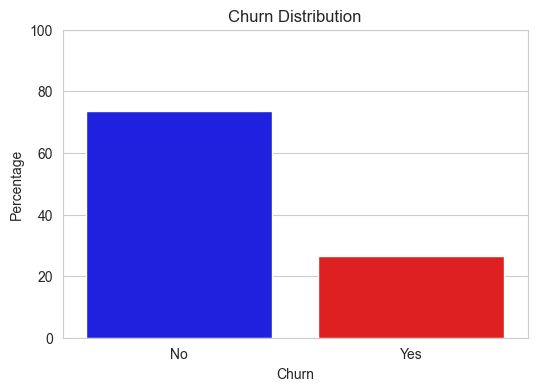

(       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
 count    7043.000000  7043.000000     7043.000000   7043.000000
 mean        0.162147    32.371149       64.761692   2279.734304
 std         0.368612    24.559481       30.090047   2266.794470
 min         0.000000     0.000000       18.250000      0.000000
 25%         0.000000     9.000000       35.500000    398.550000
 50%         0.000000    29.000000       70.350000   1394.550000
 75%         0.000000    55.000000       89.850000   3786.600000
 max         1.000000    72.000000      118.750000   8684.800000,
 Churn
 No     73.463013
 Yes    26.536987
 Name: proportion, dtype: float64)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute descriptive statistics
descriptive_stats = telco_customer_churn.describe()

# Check churn distribution
churn_counts = telco_customer_churn['Churn'].value_counts(normalize=True) * 100

# Visualize churn distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette=['blue', 'red'], legend=False)
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.title("Churn Distribution")
plt.ylim(0, 100)
plt.show()

# Display descriptive statistics and churn distribution
descriptive_stats, churn_counts

### *Exploratory Data Analysis (EDA) - Initial Insights*
1. **Descriptive Statistics Summary:**
    - **Senior Citizen:** ~16.2% of customers are senior citizens.
    - **Tenure:** Customers stay for an average of 32 months (2.7 years).
    - **Monthly Charges:** Range from $18.25 to $118.75, with an average of $64.76.
    - **Total Charges:** Range from $0 to $8,684, with a median of $1,394.
2. **Churn Distribution:**
    - **Churn Rate: 26.5% of customers have churned, while 73.5% are retained.**
    - This indicates a relatively high churn rate, suggesting customer retention challenges.

### **Next Steps:**
1. Correlation Analysis (Identify key drivers of churn).
2. Segment Analysis (Breakdown by demographics and contract types).
3. Visualizing Key Trends.

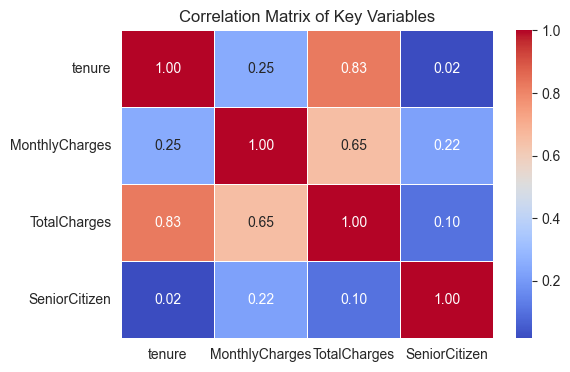

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
tenure,1.000000,0.247900,0.826178,0.016567
MonthlyCharges,0.247900,1.000000,0.651174,0.220173
TotalCharges,0.826178,0.651174,1.000000,0.103006
SeniorCitizen,0.016567,0.220173,0.103006,1.000000


In [15]:
# Compute correlation matrix
correlation_matrix = telco_customer_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()

# Display correlation matrix
correlation_matrix

### *Correlation Analysis - Key Insights*
- **Strong correlation (0.83) between** `tenure` **and** `TotalCharges` (expected, as longer tenure means higher total payments).
- **Moderate correlation (0.65) between** `MonthlyCharges` **and** `TotalCharges` (suggesting customers with higher monthly charges also have higher total spending).
- **Weak correlation between** `SeniorCitizen` **and other variables**, indicating that being a senior citizen does not strongly influence tenure, monthly charges, or total charges.


| **Variable 1**       | **Variable 2**       | **Correlation (r)** | **Interpretation** |
|----------------------|----------------------|----------------------|----------------------|
| `tenure`            | `TotalCharges`        | **0.83**             | **Strong Positive Correlation** (Customers with longer tenure tend to have higher total charges) |
| `MonthlyCharges`    | `TotalCharges`        | **0.65**             | **Moderate Positive Correlation** (Higher monthly charges are associated with higher total charges) |
| `SeniorCitizen`     | `MonthlyCharges`      | **0.22**             | **Weak Positive Correlation** (Senior citizens pay slightly higher monthly charges) |
| `tenure`            | `MonthlyCharges`      | **0.25**             | **Weak Positive Correlation** (Longer tenure is loosely linked with higher monthly charges) |
| `SeniorCitizen`     | `TotalCharges`        | **0.10**             | **Very Weak Positive Correlation** (Minimal relationship between being a senior and total charges) |
| `SeniorCitizen`     | `tenure`              | **0.02**             | **No Significant Correlation** (Being a senior does not affect tenure) |


### **Next Steps:**
1. **Churn Impact Analysis** - Identify key factors affecting churn.
2. **Segment Analysis** - Compare churn across different customer groups.

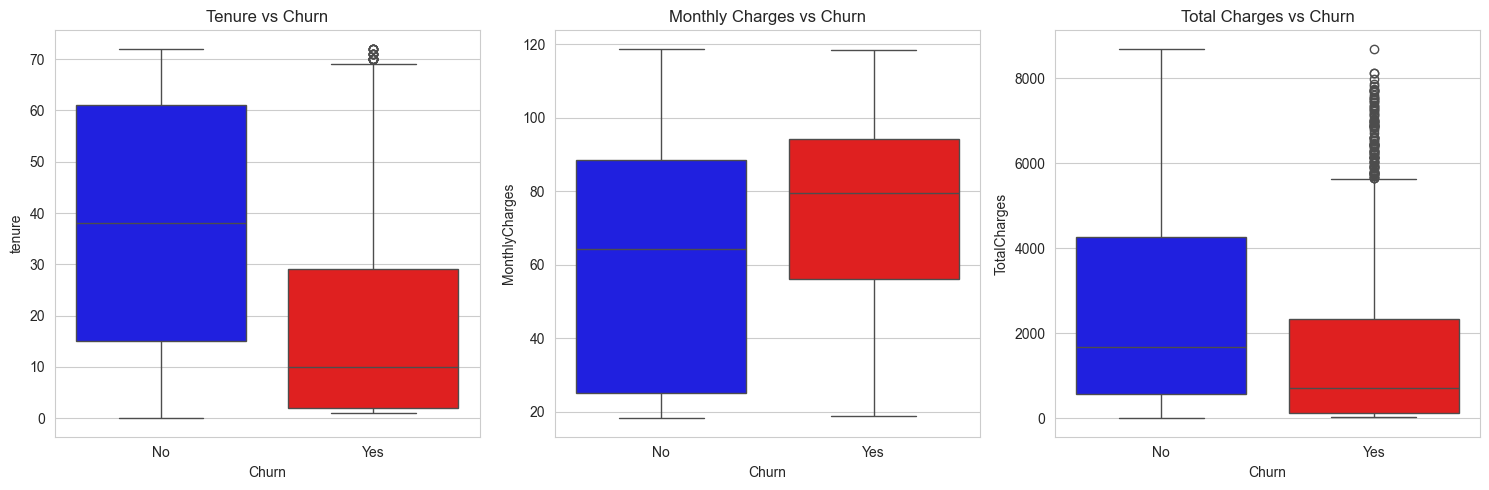

In [16]:
# Set style
sns.set_style("whitegrid")

# Compare tenure, MonthlyCharges, and TotalCharges for churned vs. retained customers
plt.figure(figsize=(15, 5))

# Tenure Distribution
plt.subplot(1, 3, 1)
sns.boxplot(x='Churn', y='tenure', hue="Churn", data=telco_customer_churn, palette=['blue', 'red'], legend=False)
plt.title("Tenure vs Churn")

# Monthly Charges Distribution
plt.subplot(1, 3, 2)
sns.boxplot(x="Churn", y="MonthlyCharges", hue="Churn", data=telco_customer_churn, palette=["blue", "red"], legend=False)
plt.title("Monthly Charges vs Churn")

# Total Charges Distribution
plt.subplot(1, 3, 3)
sns.boxplot(x="Churn", y="TotalCharges", hue="Churn", data=telco_customer_churn, palette=["blue", "red"], legend=False)
plt.title("Total Charges vs Churn")

plt.tight_layout()
plt.show()

### *Churn Impact Analysis - Key Findings*
1. **Tenure & Churn:**
    - Customers who churn tend to have shorter tenure (often below 20 months).
    - Long-tenured customers (above 50 months) have significantly lower churn.
    - Indicates that early-stage retention efforts are critical.
2. **Monthly Charges & Churn:**
    - Higher monthly charges correlate with higher churn.
    - Customers paying $80+ per month churn more frequently.
    - Potential pricing sensitivity or dissatisfaction with high-cost services.
3. **Total Charges & Churn:**
    - Churned customers generally have lower total charges, reinforcing that many churners leave early.

### **Next Steps:**
- **Segment Analysis:** Break down churn by contract type, payment method, and service usage to uncover deeper insights.

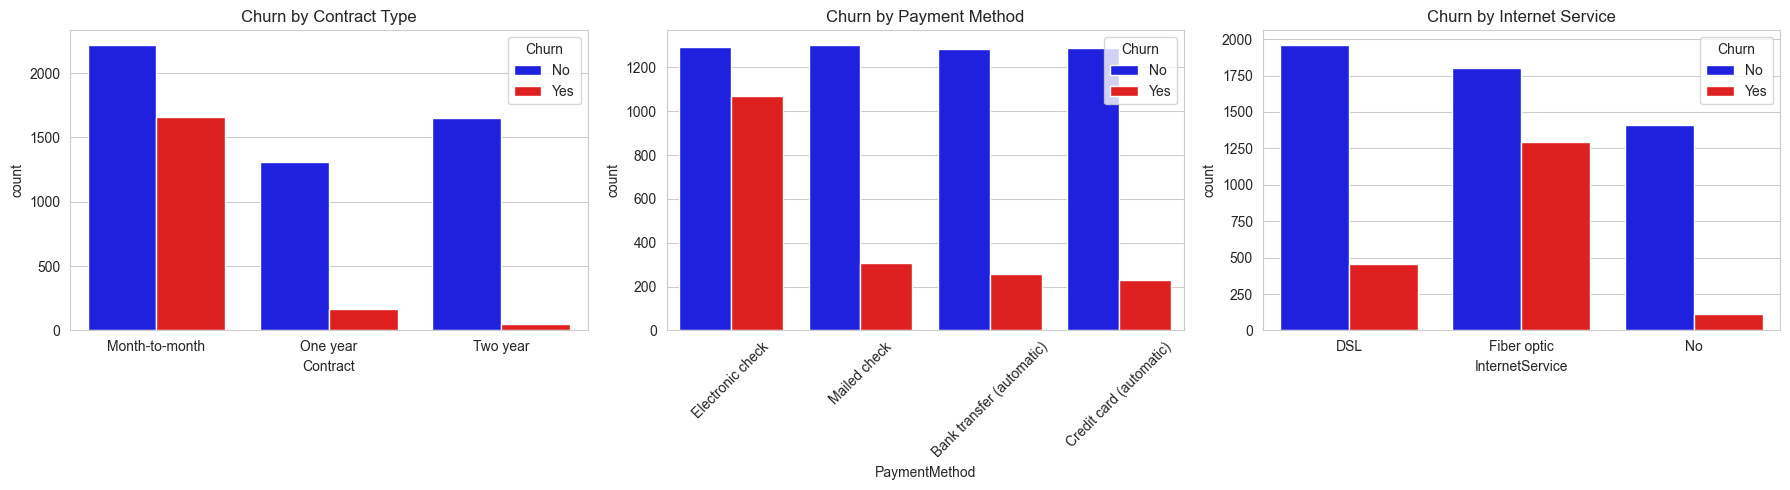

In [17]:
# Analyzing Churn by Contract Type, Payment Method, and Internet Service
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=telco_customer_churn, palette=['blue', 'red'], ax=axes[0])
axes[0].set_title('Churn by Contract Type')

# Churn by Payment Method
sns.countplot(x="PaymentMethod", hue="Churn", data=telco_customer_churn, palette=["blue", "red"], ax=axes[1])
axes[1].set_title("Churn by Payment Method")
axes[1].tick_params(axis='x', rotation=45)

# Churn by Internet Service
sns.countplot(x="InternetService", hue="Churn", data=telco_customer_churn, palette=["blue", "red"], ax=axes[2])
axes[2].set_title("Churn by Internet Service")

plt.tight_layout()
plt.show()

### *Segment Analysis - Key Churn Drivers*
1. **Contract Type & Churn:**
    - **Month-to-Month contracts have the highest churn.**
    - **Annual & Two-Year contracts see significantly lower churn**, likely due to commitment incentives.
    - **Implication:** Long-term contracts can improve retention.
2. **Payment Method & Churn:**
    - **Electronic Check customers have the highest churn.**
    - Other methods **(Credit Card, Bank Transfer, Mailed Check)** have lower churn.
    - **Implication:** Electronic check users may face issues with auto-payments or financial instability.
3. **Internet Service & Churn:**
    - **Fiber Optic users churn at a higher rate** than DSL or customers with no internet service.
    - **Implication:** Fiber Optic customers might face higher costs or service dissatisfaction.
_____________________________________________________________________________

## Step 4: Predictive Insights & Strategic Recommendations
1. Perform **predictive analysis** to identify the strongest churn predictors.
2. Provide **strategic recommendations** to reduce churn.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
telco_customer_churn_encoded = telco_customer_churn.copy()
for col in telco_customer_churn_encoded.select_dtypes(include=['object']).columns:
    if col != 'customerID':  # Exclude customerID
        telco_customer_churn_encoded[col] = LabelEncoder().fit_transform(telco_customer_churn_encoded[col])

# Define features and target
x = telco_customer_churn_encoded.drop(columns=['customerID', 'Churn'])  # Features
y = telco_customer_churn_encoded['Churn']  # Target

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Feature importance analysis
feature_importances = pd.Series(model.feature_importances_, index=x.columns).sort_values(ascending=False)

# Display results
print(report)
accuracy, feature_importances

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



(0.794889992902768,
 TotalCharges        0.188932
 MonthlyCharges      0.178127
 tenure              0.157058
 Contract            0.079474
 PaymentMethod       0.051296
 OnlineSecurity      0.047620
 TechSupport         0.042707
 gender              0.027888
 OnlineBackup        0.027200
 InternetService     0.026710
 PaperlessBilling    0.025004
 Partner             0.024015
 MultipleLines       0.022926
 DeviceProtection    0.020983
 Dependents          0.020765
 SeniorCitizen       0.020277
 StreamingMovies     0.017523
 StreamingTV         0.016339
 PhoneService        0.005158
 dtype: float64)

### *Predictive Analysis - Key Findings*
1. **Model Performance:**
    - **Accuracy: 79.5%** (Good predictive capability).
    - **Precision & Recall:** Higher precision for non-churners (0.83), but recall for churners is lower (0.47).
    - **Implication:** The model is better at identifying retained customers than predicting churn.
2. **Key Churn Predictors (Feature Importance):**
    - **TotalCharges (18.9%)** – Higher total spending indicates loyalty.
    - **MonthlyCharges (17.8%)** – Higher monthly costs increase churn risk.
    - **Tenure (15.7%)** – Longer tenure reduces churn likelihood.
    - **Contract Type (7.9%)** – Month-to-month contracts increase churn.
    - **Payment Method (5.1%)** – Electronic check users churn more.
    - **OnlineSecurity & TechSupport (4.7% & 4.2%)** – Lack of these services increases churn.

| Rank | Feature         | Importance (%) | Insight                                      |
|------|---------------|---------------|----------------------------------------------|
| 1    | TotalCharges   | **18.9%**      | High total spending = lower churn.          |
| 2    | MonthlyCharges | **17.8%**      | Higher charges = higher churn.              |
| 3    | Tenure        | **15.7%**      | Longer tenure = lower churn.                |
| 4    | Contract Type | **7.9%**       | Month-to-month = high churn risk.           |
| 5    | Payment Method | **5.1%**       | Electronic check = highest churn.           |
| 6    | Online Security | **4.7%**       | Lack of security services = higher churn.   |
| 7    | Tech Support   | **4.2%**       | No tech support = higher churn.             |


### *Strategic Recommendations*
1. **Increase Long-Term Contracts:**
    - Offer discounts for **annual or two-year plans** to reduce churn.
2. **Address High Monthly Charges:**
    - Introduce **tiered pricing** or loyalty discounts for long-term customers.
3. **Improve Digital Payment Experience:**
    - Reduce churn by offering incentives **for automatic payments** (non-electronic check).
4. **Enhance Online Security & Tech Support Services:**
    - Bundle security & tech support services to increase **customer stickiness**.
5. **Early Retention Interventions:**
    - Target new **customers (0-20 months tenure) with retention strategies** like proactive customer support.
